In [79]:
#import all config and libraries
if __name__ == '__main__' and '__file__' not in globals():
    %run base.ipynb
    
#in case imports have updated this notebook will re-run
%reload_ext autoreload
%autoreload 2

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok



 Numpy: 1.23.5

 sklearn: 1.2.1


In [ ]:
#USER INPUT CELL

#Specify the file names here
input_file=r"https://raw.githubusercontent.com/fenago/datasets/main/mushrooms.csv"
# input_file=r'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
output_file=r"C:\Users\John\Downloads\mle\output_after_structural_analysis.parquet"
response_variable = 'TODO'
#TODO : using pathlib delete parquet if exists or create one and save df_raw

threshold_category=100 #if object type columns have unique count less than or equal to this then convert to categorical type
#since this dataset has all columns as category cast all of them into category

In [ ]:
if file.endswith('csv'):
    df=pd.read_csv(input_file)

if file.endswith('xls') or file.endswith('xlsx'):
    df=pd.read_excel(input_file)


# df.to_parquet(path=output_file,engine='pyarrow',index=False)

* techniques for outlier detection
* think whether the datapoint is outlier or extreme value

(a) IQF : use Tukey Method ; Q3 - Q1 (+- 1.5 IQR is the boundary); sometime you can even use 2 or 2.5. Tukey assumes normality ; so do a histplot before doing this. For non-normal try log-normal probably. Tukey is TRIMMING i.e. splicing outliers. Q1 andQ3 are FENCES. Values outside these will be trimmed

(b) Winsorize. Replaces extreme value with less extreme value

(c) Log Transformation


In [2]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.2,Ideal,E,SI2,61.5,55.0,326,4.0,4.0,2.4
1,0.2,Premium,E,SI1,59.8,61.0,326,3.9,3.8,2.3
2,0.2,Good,E,VS1,56.9,65.0,327,4.0,4.1,2.3
3,0.3,Premium,I,VS2,62.4,58.0,334,4.2,4.2,2.6
4,0.3,Good,J,SI2,63.3,58.0,335,4.3,4.3,2.8


In [3]:
df=df.dropna()

<AxesSubplot: xlabel='table'>

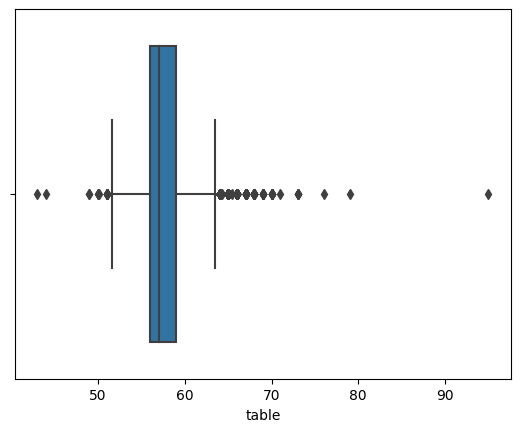

In [12]:
sns.boxplot(data=df,x='table')
plt.show()

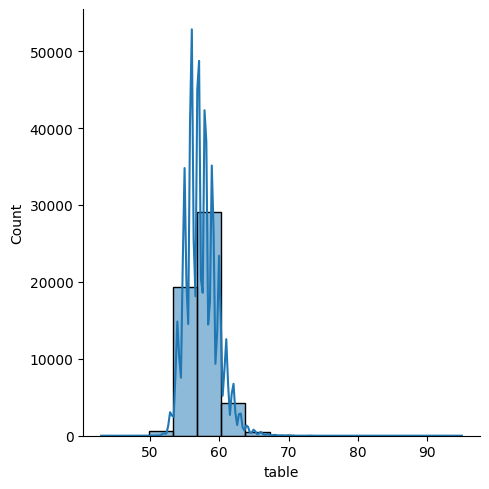

In [17]:
sns.displot(df['table'],bins=15,kde=True)
plt.show()

In [18]:
Q1 = df['table'].quantile(0.25)
Q1

56.0

In [19]:
Q3 = df['table'].quantile(0.75)
Q3

59.0

In [20]:
IQR = Q3 - Q1
IQR

3.0

In [21]:
lower_lim = Q1 - 1.5 * IQR
lower_lim

51.5

In [22]:
upper_lim = Q3 + 1.5 * IQR
upper_lim

63.5

In [23]:
# Dropping outliers
outlier_15_low=(df['table']<lower_lim)
outlier_15_up=(df['table'] > upper_lim)

In [25]:
sum(outlier_15_up)

589

In [26]:
sum(outlier_15_low)

16

In [27]:
len(df['table'])

53940

In [28]:
n_outliers = sum(outlier_15_up) + sum(outlier_15_low)
n_outliers

605

In [30]:
n_total=len(df['table'])
print(f'Total {str(n_total)}')
n_outliers=len(df['table'][outlier_15_low]) + len(df['table'][outlier_15_up])
print(f'Outlier Count : {str(n_outliers)}')
n_valid=n_total+n_outliers

print(f'Total Feature Count after outlier removed is {n_valid}')

Total 53940
Outlier Count : 605
Total Feature Count after outlier removed is 54545


In [31]:
df['table'][(outlier_15_low|outlier_15_up)] #records that are outliers

2       65.0
91      69.0
145     64.0
219     64.0
227     67.0
        ... 
53695   65.0
53697   65.0
53756   64.0
53757   64.0
53785   65.0
Name: table, Length: 605, dtype: float64

In [32]:
df['table'][~(outlier_15_low|outlier_15_up)] #records that are NOT outliers

0       55.0
1       61.0
3       58.0
4       58.0
5       57.0
        ... 
53935   57.0
53936   55.0
53937   60.0
53938   58.0
53939   55.0
Name: table, Length: 53335, dtype: float64

In [33]:
#cleaned dataset

df = df[~(outlier_15_low | outlier_15_up)] 
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.2,Ideal,E,SI2,61.5,55.0,326,4.0,4.0,2.4
1,0.2,Premium,E,SI1,59.8,61.0,326,3.9,3.8,2.3
3,0.3,Premium,I,VS2,62.4,58.0,334,4.2,4.2,2.6
4,0.3,Good,J,SI2,63.3,58.0,335,4.3,4.3,2.8
5,0.2,Very Good,J,VVS2,62.8,57.0,336,3.9,4.0,2.5


In [34]:
df.to_csv('diamondsDF_no_outliers.csv')

C:\Users\John\AppData\Local\Temp\ipykernel_20668\2353028539.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(outliers, label='Outliers')
C:\Users\John\Downloads\.venv\lib\site-packages\seaborn\distributions.py:2479: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\John\Downloads\.venv\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\John\Downloads\.venv\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<AxesSubplot: xlabel='table'>

C:\Users\John\AppData\Local\Temp\ipykernel_20668\2353028539.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(valid_data, label='Valid Data')


<AxesSubplot: xlabel='table', ylabel='Density'>

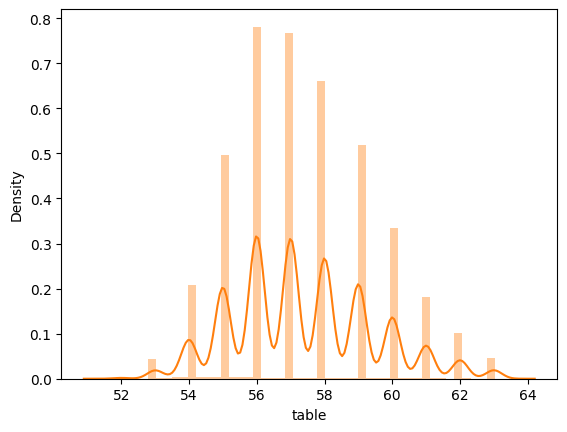

In [37]:
outliers = df['table'][(outlier_15_low | outlier_15_up)]
valid_data = df['table'][~(outlier_15_low | outlier_15_up)]

sns.distplot(outliers, label='Outliers')
sns.distplot(valid_data, label='Valid Data')

<AxesSubplot: xlabel='table'>

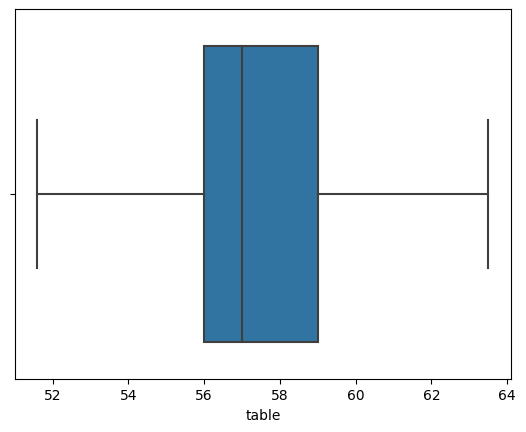

In [38]:
sns.boxplot(x = df['table'])
plt.show()

C:\Users\John\AppData\Local\Temp\ipykernel_20668\2386008540.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['table'],bins=10,kde=False)


<AxesSubplot: xlabel='table'>

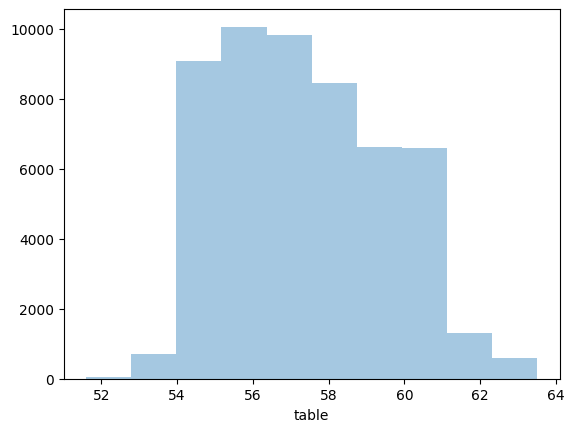

In [39]:
sns.distplot(df['table'],bins=10,kde=False)
plt.show()

# Winsorize Method

Winsorizing is a method used in outlier detection to reduce the effect of extreme values or outliers in statistical data. The method involves limiting the extreme values in the dataset by replacing them with less extreme values that are closer to the rest of the data. This can help reduce the impact of outliers on summary statistics such as mean and standard deviation.The Winsorize method is named after Charles P. Winsor, a biostatistician who developed this technique. There are different ways to apply Winsorizing, but one common approach is to replace the smallest and largest values in a dataset with observations that are closest to them.Winsorizing can be useful when dealing with datasets that have extreme values or outliers that may skew summary statistics or affect subsequent analysis. However, it is important to carefully consider which observations should be replaced and how much they should be adjusted, as this can affect the interpretation of results.

Winsorizing is different from trimming, which involves removing data points instead of replacing them. Trimming amounts to simply removing outliers from a dataset, while Winsorizing changes each outlier's value to that of its nearest inlier
[4]
. An important property of Winsorizing is that it preserves some original information since it reduces outlier weight without eliminating them entirely, so former outliers still have influence in models or statistical calculations
[4]

Trimming is happening in Tukey Method

=================================================================
Winsorizing allows us to handle outliers in a more controlled manner while still retaining as much information as possible. However, whether it is desirable to use Winsorization to give every feature the same distribution is going to depend on the particular application. In some cases, it might not be helpful to normalize the data. Achieving the 'right balance of two effects' is not something done based on just data transformations. If one variable is the subject's Pokemon level and the other is their lab test result for serum albumin, it might not be desirable to give both equal weight when scoring them. In the case of economic measures from U.S. Census data, Winsorization might be useful to create a measure of prosperity/poverty of a zip code tabulation area

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Q: Does this have normality assumption

Standardization does not change the underlying distribution of the data, and in regression, there is no assumption regarding the distribution of independent variables. The requirement is only that the residuals of the model be normally distributed. Therefore, standardizing the independent variables will not change the distribution of the data [4].

In conclusion, Winsorizing can be used on non-normal distributions, and there is no assumption of normality regarding the independent variables in regression.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Q: How much to trim

The recommended limits for winsorizing depend on the data set. Generally, the lower limit should be set to the 5th percentile of the data set, and the upper limit should be set to the 95th percentile of the data set. This will ensure that any outliers are removed from the data set.


The limits recommended for Winsorizing depend on the specific dataset and research question at hand. In general, Winsorizing involves replacing extreme values in a dataset with less extreme values that are closer to the rest of the data. The amount of Winsorizing applied can vary depending on the desired level of robustness and the characteristics of the data.One common approach is to Winsorize at a certain percentile, such as 90% or 95%, which sets all observations above or below that percentile equal to the value at that percentile. For example, a 90% Winsorization would set all observations above the 90th percentile equal to the value at the 90th percentile.Another approach is to use a specific cutoff point, such as +/- 2 or 3 standard deviations from the mean. This can help identify extreme values that may be affecting summary statistics or subsequent analysis.Ultimately, the choice of limits for Winsorizing should be based on careful consideration of the research question and characteristics of the data. It is important to balance reducing the impact of outliers with preserving meaningful information in the dataset.

<AxesSubplot: xlabel='table'>

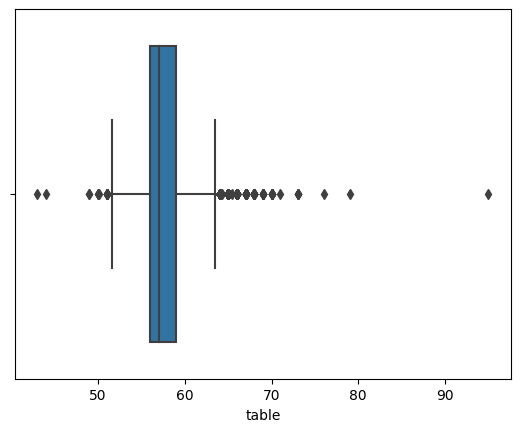

In [42]:
df = sns.load_dataset ("diamonds")
sns.boxplot(x = df['table'])
plt.show()

In [43]:
from scipy.stats.mstats import winsorize


In [44]:
df['table'].quantile(0.01)

53.0

In [45]:
df['table'].quantile(0.98)

63.0

In [47]:
# how do we treat outliers with the winsorization method
df_table_win = winsorize(df['table'],(0.01,0.02))  # lower boundary 1% - upper boundary 1-0.02 or 98th percentile or higher

In [48]:
df_table_win

masked_array(data=[55., 61., 63., ..., 60., 58., 55.],
             mask=False,
       fill_value=1e+20)

<AxesSubplot: >

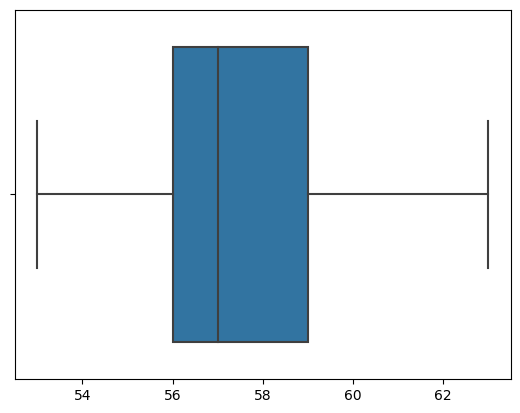

In [49]:
sns.boxplot(x=df_table_win)

C:\Users\John\AppData\Local\Temp\ipykernel_20668\465128707.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_table_win,bins=10,kde=True)


<AxesSubplot: ylabel='Density'>

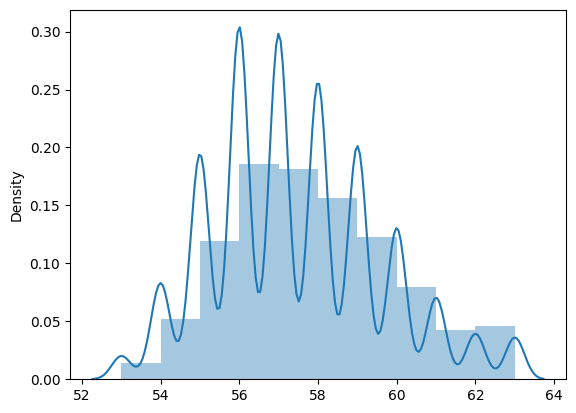

In [50]:
sns.distplot(df_table_win,bins=10,kde=True)

In [51]:
df_table_win = pd.DataFrame(df_table_win)[0]
df_table_win.describe()

count   53,940.0
mean        57.4
std          2.1
min         53.0
25%         56.0
50%         57.0
75%         59.0
max         63.0
Name: 0, dtype: float64

# Log Transformation

Examples of logarithms from the real world : 

    1. Sound volume: The decibel scale is a logarithmic scale used to measure the intensity of sound, with each increase of 10 dB representing a 10-fold increase in sound intensity.

    2. Earthquake magnitude: The Richter scale is a logarithmic scale used to measure the magnitude of earthquakes, with each increase of 1 magnitude representing a 32-fold increase in energy released.

    3. pH: The pH scale is a logarithmic scale used to measure the acidity or alkalinity of a solution, with each decrease of 1 pH unit representing a 10-fold increase in acidity.
    
    A logarithm is a way to make really big numbers easier to work with. Imagine you have a number that is really big, like 1,000,000. That's a lot of zeros! It can be hard to work with such a big number. But if we take the logarithm of that number, we get a smaller number that tells us how many times we need to multiply a smaller number by itself to get the big number.For example, the logarithm of 1,000,000 is 6 because we need to multiply 10 by itself six times (10 x 10 x 10 x 10 x 10 x 10) to get 1,000,000. So instead of working with the big number directly, we can use its logarithm as a simpler way to represent it.
    
    Some More : 

    1. Richter scale for measuring the magnitude of earthquakes
    2. Decibel scale for measuring sound intensity
    3. pH scale for measuring acidity
    4. Magnitude scale for measuring the brightness of stars
    5. Mercalli scale for measuring the intensity of earthquakes
    6. Magnitude scale for measuring the strength of tornadoes
    7. Saffir-Simpson scale for measuring the intensity of hurricanes
    8. Magnitude scale for measuring the intensity of volcanic eruptions
    9. Mohs scale for measuring the hardness of minerals
    10. Beaufort scale for measuring wind speed
    

    Richter magnitude scale and moment magnitude scale (MMS) for measuring the strength of earthquakes and movement in the Earth [0].
    pH scale used in chemistry to analyze acidic substances or bases [3].
    Decibel scale used to measure sound [3].
    Logarithmic frequency quantities used in electronics (decade, octave) and for music pitch intervals (octave, semitone, cent, etc.) [0].
    Logarithmic scale for data storage capacity (bit, byte) and signal level (decibel, bel, neper) [0].
    Logarithmic scales used in industrial measures, such as standard values for resistors, the American wire gauge, and the Birmingham gauge used for wire and needles [0].
    Logarithmic scales used in medicine and healthcare to measure factors such as pH concentrations, radioactive decay, health changes, and bacterial growth [2].
    Logarithmic scales used in archeological fields to find the values of carbon isotopes to determine the age of ancient artifacts, plants, and fibers [2].
    Logarithmic scales used in finance to express interest rates in logarithmic increments to show the growth of an investment or visualize the net worth of a group of people [2].
    Logarithmic scales used in statistics and analytics when working with problems that involve exponential equations [2].

++++++++++++++++++++++++++++++++++++++++++++++++

**Contrast logarithms with power law : **

*Power law* is a functional relationship between two quantities, where a relative change in one quantity results in a proportional relative change in the other quantity, independent of the initial size of those quantities[2]
. Power laws are ubiquitous in complex networks[1]
. Here are ten examples of power law used in real-world:1. Pareto's law of income distribution: This law states that 80% of the wealth is owned by 20% of the population[2]
.2. Scaling laws in biological systems: The metabolic rate and lifespan of animals follow power-law relationships[2]
.3. Fractals: Fractals exhibit self-similarity at different scales, which follows a power-law relationship[2]
.4. Earthquakes: The frequency and magnitude of earthquakes follow a power-law relationship known as the Gutenberg-Richter law[2]
.5. City sizes: The population size of cities follows a power-law relationship known as Zipf's law[2]
.6. Internet traffic: The amount of traffic on websites follows a power-law distribution, with a few popular websites receiving most of the traffic[5]
.7. Social networks: The number of friends or followers that people have on social media platforms follows a power-law distribution, with a few people having many more connections than others[1]
[3]
.8. Wealth distribution: Wealth is distributed according to a power-law relationship, with a few people owning most of the wealth[4]
.9. Epidemics: The spread and severity of epidemics follow power-law relationships, with some individuals being more infectious than others[2]
.10. Species abundance: The number of species in an ecosystem follows a power-law distribution, with some species being much more abundant than others[2]
.Power laws can be useful for understanding complex systems and predicting their behavior based on simple rules governing their interactions [5]
.

++++++++++++++++++++++++++++++++++++++++++++++++++++

Log transformation is used to make highly skewed data more normal or closer to normal distribution. It can also be used to reduce the effect of outliers, as a result of which the models can become more stable and accurate.

The purpose of log transformation is to reduce the skewness of a measurement variable and make patterns in the data more interpretable. Log transformation is a widely used method in biomedical and psychosocial research to address skewed data. When data is highly skewed, it can be difficult to interpret or analyze using traditional statistical methods. By taking the logarithm of the data, we can compress the range of values and reduce the impact of extreme values on summary statistics such as mean and standard deviation. This can help make patterns in the data more visible and easier to interpret.Log transformation can also help make distributions more symmetric, which can be useful for comparing groups or determining reference intervals. If, after transformation, the distribution becomes close to normal, then a reference interval might be determined.Overall, log transformation is a valuable tool for addressing skewed data and making patterns in the data more interpretable. However, it is important to carefully consider when and how to apply this transformation based on the specific characteristics of the data and research question at hand.

Log transformation is a statistical method used to transform datasets to achieve linearity [0]. It is one of several methods that can be used to transform data to obtain further insights that may not be obvious at first. A lack of linearity implies a lack of association, but there is a way to transform one or both of the variables so that a nonlinear relationship can be changed into a linear relationship [0]. A log transformation can be used to make highly skewed distributions less skewed. This can be valuable both for making patterns in the data more interpretable and for helping to meet the assumptions of inferential statistics [1].
The log transformation is particularly relevant when the data vary a lot on the relative scale [4]. It can make additive and linear models make more sense because a multiplicative model on the original scale corresponds to an additive model on the log scale. For example, a treatment that increases prices by 2%, rather than a treatment that increases prices by $20 [4]. The log transformation is often favored because it is easy to interpret its result in terms of "fold changes" [3].



In [53]:
df = sns.load_dataset ("diamonds")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.2,Ideal,E,SI2,61.5,55.0,326,4.0,4.0,2.4
1,0.2,Premium,E,SI1,59.8,61.0,326,3.9,3.8,2.3
2,0.2,Good,E,VS1,56.9,65.0,327,4.0,4.1,2.3
3,0.3,Premium,I,VS2,62.4,58.0,334,4.2,4.2,2.6
4,0.3,Good,J,SI2,63.3,58.0,335,4.3,4.3,2.8


0   0.2
1   0.2
2   0.2
3   0.3
4   0.3
Name: carat, dtype: float64

<AxesSubplot: xlabel='carat'>

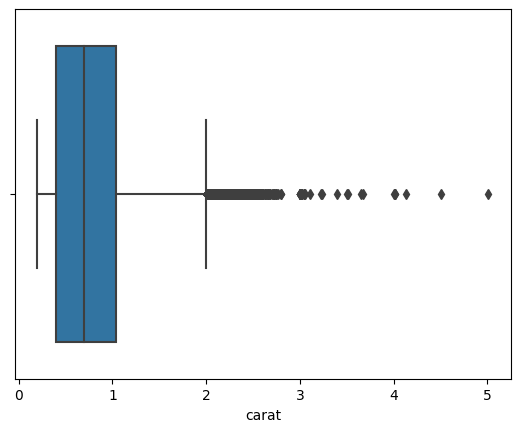

In [54]:
df['carat'].head()
sns.boxplot(x=df['carat'])

In [55]:
df_carat_log=np.log(df['carat'])

In [56]:
df['carat'].head()

0   0.2
1   0.2
2   0.2
3   0.3
4   0.3
Name: carat, dtype: float64

C:\Users\John\AppData\Local\Temp\ipykernel_20668\289436768.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carat'],bins=10,kde=False)


<AxesSubplot: xlabel='carat'>

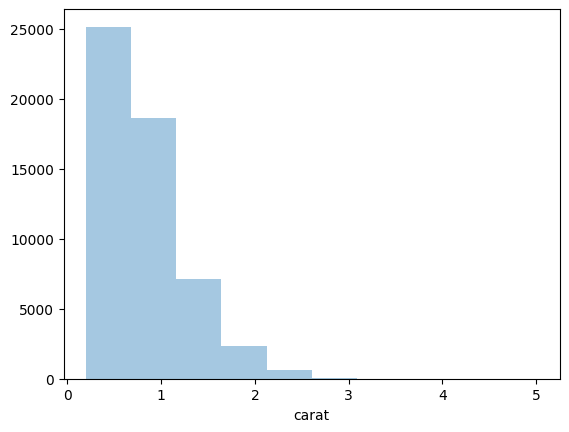

In [59]:
sns.distplot(df['carat'],bins=10,kde=False)

In [60]:
df_carat_log = np.log(df['carat'])

In [61]:
df_carat_log.head()

0   -1.5
1   -1.6
2   -1.5
3   -1.2
4   -1.2
Name: carat, dtype: float64

<AxesSubplot: xlabel='carat'>

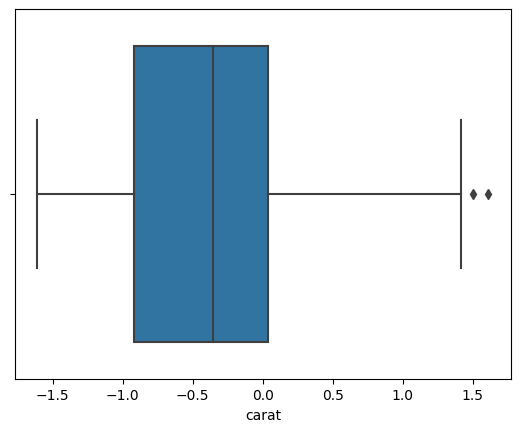

In [62]:
sns.boxplot(x=df_carat_log)

# Feature Selection

In this notebook we will develop a Python class for feature detection. The objective is to create a an object that encompasses several different feature selection methods and that can be applied to multiple datasets. This class will implement five different feature selection methods:

1. Remove columns with a missing fraction greater than a specified threshold
2. Remove features with only a single unique value
3. Remove collinear features as idenfitied by a correlation coefficient greater than a specified value
4. Remove features with 0.0 importance from a gradient boosting machine
5. Remove features that do not contribute to a specified cumulative feature importance from the gradient boosting machine

In [65]:
import pandas as pd
import numpy as np

import lightgbm as lgb

from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import seaborn as sns

import gc

from sklearn.exceptions import NotFittedError

from itertools import chain

In [66]:
# You can download the data from here:  https://drive.google.com/file/d/1nyQzb-5o-B7TVH06LL4XglPaxdAHbTuf/view?usp=share_link
# train = pd.read_csv('/content/application_train.csv')
train=pd.read_csv(r"C:\Users\John\Downloads\mle\application_train.csv")
train = train.sample(10000)
train_labels = train['TARGET']
train = train.drop(columns = 'TARGET')

In [67]:
train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
201115,333126,Cash loans,F,N,Y,0,"112,500.0","152,820.0","10,210.5","135,000.0",Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.0,-16161,-5109,"-8,481.0",-4478,NaN,1,1,0,1,1,0,Cleaning staff,2.0,2,2,TUESDAY,13,0,0,0,0,0,0,Business Entity Type 3,NaN,0.7,0.7,0.0,0.0,1.0,0.6,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.6,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.6,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,reg oper account,block of flats,0.0,"Stone, brick",No,0.0,0.0,0.0,0.0,-338.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,0.0,2.0
248213,387180,Cash loans,M,Y,N,1,"315,000.0","884,178.0","86,265.0","850,500.0",Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.0,-15508,-2479,"-2,422.0",-4655,9.0,1,1,0,1,0,0,Drivers,3.0,2,2,FRIDAY,12,0,0,0,0,0,0,Business Entity Type 3,0.3,0.4,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,0.0,8.0,0.0,-701.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
224442,359953,Revolving loans,M,N,N,0,"112,500.0","180,000.0","9,000.0","180,000.0",Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.0,-16641,-8067,"-1,674.0",-178,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,FRIDAY,10,0,0,0,0,1,1,Other,NaN,0.4,NaN,0.0,0.0,1.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,not specified,block of flats,0.0,Wooden,Yes,1.0,0.0,1.0,0.0,-170.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
226620,362500,Cash loans,F,Y,Y,0,"157,500.0","269,550.0","18,891.0","225,00

In [68]:
import pandas as pd
import numpy as np

import lightgbm as lgb

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import gc

from sklearn.exceptions import NotFittedError

from itertools import chain

class FeatureSelector():
    """
    Class for performing feature selection for machine learning or data preprocessing.
    
    Implements five different methods
    
        1. Remove columns with a missing percentage greater than a specified threshold
        2. Remove columns with a single unique value
        3. Remove collinear variables with a correlation greater than a specified correlation coefficient
        4. Remove features with 0.0 feature importance from a gradient boosting machine (gbm)
        5. Remove features that do not contribute to a specified cumulative feature importance from the gbm
        
    Attributes
    --------
    
    record_missing : dataframe
        Records the fraction of missing values for features with missing fraction above threshold
    
    record_single_unique : dataframe
        Records the features that have a single unique value
    
    record_collinear : dataframe
        Records the pairs of collinear variables with a correlation coefficient above the threshold
    
    record_zero_importance : dataframe
        Records the zero importance features in the data according to the gbm
    
    record_low_importance : dataframe
        Records the lowest importance features not needed to reach the threshold of cumulative importance according to the gbm
    
    feature_importances : dataframe
        All the features importances from the gbm
    
    removal_ops : dict
        Dictionary of removal operations and associated features for removal identified
        
    Notes
    --------
    
        - All 5 operations can be run with the `identify_all` method.
        - Calculating the feature importances requires labels (a supervised learning task) 
          for training the gradient boosting machine
        - For the feature importances, the dataframe is first one-hot encoded before training the gbm.
    
    """
    
    def __init__(self):
        
        # Dataframes recording information about features to remove
        self.record_missing = None
        self.record_single_unique = None
        self.record_collinear = None
        self.record_zero_importance = None
        self.record_low_importance = None
        
        self.feature_importances = None
        
        # Dictionary to hold removal operations
        self.removal_ops = {}
        
        
        
    def identify_missing(self, data, missing_threshold):
        """Find the features with a fraction of missing values above `missing_threshold`"""
        
        self.missing_threshold = missing_threshold

        # Calculate the fraction of missing in each column 
        missing_series = data.isnull().sum() / data.shape[0]
        
        self.missing_stats = pd.DataFrame(missing_series).rename(columns = {'index': 'feature', 0: 'missing_fraction'})

        # Find the columns with a missing percentage above the threshold
        record_missing = pd.DataFrame(missing_series[missing_series > missing_threshold]).reset_index().rename(columns = {'index': 'feature', 0: 'missing_fraction'})

        to_drop = list(record_missing['feature'])

        self.record_missing = record_missing
        self.removal_ops['missing'] = to_drop
        
        print('%d features with greater than %0.2f missing values.\n' % (len(self.removal_ops['missing']), self.missing_threshold))
        
    def identify_single_unique(self, data):
        """Identifies features with only a single unique value. NaNs do not count as a unique value. """

        # Calculate the unique counts in each column
        unique_counts = data.nunique()

        self.unique_stats = pd.DataFrame(unique_counts).rename(columns = {'index': 'feature', 0: 'nunique'})
        
        # Find the columns with only one unique count
        record_single_unique = pd.DataFrame(unique_counts[unique_counts == 1]).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})

        to_drop = list(record_single_unique['feature'])
    
        self.record_single_unique = record_single_unique
        self.removal_ops['single_unique'] = to_drop
        
        print('%d features with a single unique value.\n' % len(self.removal_ops['single_unique']))
    
    def identify_collinear(self, data, correlation_threshold):
        """
        Finds collinear features based on the correlation coefficient between features. 
        For each pair of features with a correlation coefficient greather than `correlation_threshold`,
        only one of the pair is identified for removal. 

        Using code adapted from: https://gist.github.com/Swarchal/e29a3a1113403710b6850590641f046c
        
        Parameters
        --------

        data : dataframe
            Data observations in the rows and features in the columns

        correlation_threshold : float between 0 and 1
            Value of the Pearson correlation cofficient for identifying correlation features

        """
        
        self.correlation_threshold = correlation_threshold

        # Calculate the correlations between every column
        corr_matrix = data.corr()
        
        self.corr_matrix = corr_matrix
    
        # Extract the upper triangle of the correlation matrix
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
        
        # Select the features with correlations above the threshold
        # Need to use the absolute value
        to_drop = [column for column in upper.columns if any(upper[column].abs() > correlation_threshold)]

        # Dataframe to hold correlated pairs
        record_collinear = pd.DataFrame(columns = ['drop_feature', 'corr_feature', 'corr_value'])

        # Iterate through the columns to drop
        for column in to_drop:

            # Find the correlated features
            corr_features = list(upper.index[upper[column].abs() > correlation_threshold])

            # Find the correlated values
            corr_values = list(upper[column][upper[column].abs() > correlation_threshold])
            drop_features = [column for _ in range(len(corr_features))]    

            # Record the information (need a temp df for now)
            temp_df = pd.DataFrame.from_dict({'drop_feature': drop_features,
                                             'corr_feature': corr_features,
                                             'corr_value': corr_values})

            # Add to dataframe
            record_collinear = record_collinear.append(temp_df, ignore_index = True)

            
        self.record_collinear = record_collinear
        self.removal_ops['collinear'] = to_drop
        
        print('%d features with a correlation greater than %0.2f.\n' % (len(self.removal_ops['collinear']), self.correlation_threshold))

    def identify_zero_importance(self, features, labels, eval_metric, task='classification', 
                                 n_iterations=10, early_stopping = True):
        """
        
        Identify the features with zero importance according to a gradient boosting machine.
        The gbm can be trained with early stopping using a validation set to prevent overfitting. 
        The feature importances are averaged over n_iterations to reduce variance. 
        
        Uses the LightGBM implementation (http://lightgbm.readthedocs.io/en/latest/index.html)

        Parameters 
        --------
        features : dataframe
            Data for training the model with observations in the rows
            and features in the columns

        labels : array, shape = (1, )
            Array of labels for training the model. These can be either binary 
            (if task is 'classification') or continuous (if task is 'regression')

        eval_metric : string
            Evaluation metric to use for the gradient boosting machine

        task : string, default = 'classification'
            The machine learning task, either 'classification' or 'regression'

        n_iterations : int, default = 10
            Number of iterations to train the gradient boosting machine
            
        early_stopping : boolean, default = True
            Whether or not to use early stopping with a validation set when training
        
        
        Notes
        --------
        
        - Features are one-hot encoded to handle the categorical variables before training.
        - The gbm is not optimized for any particular task and might need some hyperparameter tuning
        - Feature importances, including zero importance features, can change across runs

        """

        # One hot encoding
        features = pd.get_dummies(features)

        # Extract feature names
        feature_names = list(features.columns)

        # Convert to np array
        features = np.array(features)
        labels = np.array(labels).reshape((-1, ))

        # Empty array for feature importances
        feature_importance_values = np.zeros(len(feature_names))
        
        print('Training Gradient Boosting Model\n')
        
        # Iterate through each fold
        for _ in range(n_iterations):

            if task == 'classification':
                model = lgb.LGBMClassifier(n_estimators=1000, learning_rate = 0.05, verbose = -1)

            elif task == 'regression':
                model = lgb.LGBMRegressor(n_estimators=1000, learning_rate = 0.05, verbose = -1)

            else:
                raise ValueError('Task must be either "classification" or "regression"')
                
            # If training using early stopping need a validation set
            if early_stopping:
                
                train_features, valid_features, train_labels, valid_labels = train_test_split(features, labels, test_size = 0.15)

                # Train the model with early stopping
                model.fit(train_features, train_labels, eval_metric = eval_metric,
                          eval_set = [(valid_features, valid_labels)],
                          early_stopping_rounds = 100, verbose = -1)
                
                # Clean up memory
                gc.enable()
                del train_features, train_labels, valid_features, valid_labels
                gc.collect()
                
            else:
                model.fit(features, labels)

            # Record the feature importances
            feature_importance_values += model.feature_importances_ / n_iterations

        feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

        # Sort features according to importance
        feature_importances = feature_importances.sort_values('importance', ascending = False).reset_index(drop = True)

        # Normalize the feature importances to add up to one
        feature_importances['normalized_importance'] = feature_importances['importance'] / feature_importances['importance'].sum()
        feature_importances['cumulative_importance'] = np.cumsum(feature_importances['normalized_importance'])

        # Extract the features with zero importance
        record_zero_importance = feature_importances[feature_importances['importance'] == 0.0]
        
        to_drop = list(record_zero_importance['feature'])

        self.feature_importances = feature_importances
        self.record_zero_importance = record_zero_importance
        self.removal_ops['zero_importance'] = to_drop
        
        print('\n%d features with zero importance.\n' % len(self.removal_ops['zero_importance']))
    
    def identify_low_importance(self, cumulative_importance):
        """
        Finds the lowest importance features not needed to account for `cumulative_importance` 
        of the feature importance from the gradient boosting machine. As an example, if cumulative
        importance is set to 0.95, this will retain only the most important features needed to 
        reach 95% of the total feature importance. The identified features are those not needed.

        Parameters
        --------
        cumulative_importance : float between 0 and 1
            The fraction of cumulative importance to account for 

        """

        self.cumulative_importance = cumulative_importance
        
        # The feature importances need to be calculated before running
        if self.feature_importances is None:
            raise NotFittedError('Feature importances have not yet been determined. Call the `identify_zero_importance` method` first.')
            
        # Make sure most important features are on top
        self.feature_importances = self.feature_importances.sort_values('cumulative_importance')

        # Identify the features not needed to reach the cumulative_importance
        record_low_importance = self.feature_importances[self.feature_importances['cumulative_importance'] > cumulative_importance]

        to_drop = list(record_low_importance['feature'])

        self.record_low_importance = record_low_importance
        self.removal_ops['low_importance'] = to_drop
    
        print('%d features that do not contribute to cumulative importance of %0.2f.\n' % (len(self.removal_ops['low_importance']), self.cumulative_importance))
        
    def identify_all(self, features, labels, selection_params):
        """
        Use all five of the methods to identify features to remove.
        
        Parameters
        --------
        
        features : dataframe
            Data for training the model with observations in the rows
            and features in the columns

        labels : array, shape = (1, )
            Array of labels for training the model. These can be either binary 
            (if task is 'classification') or continuous (if task is 'regression')
            
        selection_params : dict
           Parameters to use in the five feature selection methhods.
           Params must contain the keys ['missing_threshold', 'correlation_threshold', 'eval_metric', 'task', 'cumulative_importance']
        
        """
        
        # Check for all required parameters
        for param in ['missing_threshold', 'correlation_threshold', 'eval_metric', 'task', 'cumulative_importance']:
            if param not in selection_params.keys():
                raise ValueError('%s is a required parameter for this method' % param)
        
        # Implement each of the five methods
        self.identify_missing(features, selection_params['missing_threshold'])
        self.identify_single_unique(features)
        self.identify_collinear(features, selection_params['correlation_threshold'])
        self.identify_zero_importance(features, labels, selection_params['eval_metric'], selection_params['task'])
        self.identify_low_importance(selection_params['cumulative_importance'])
        
        # Find the number of features identified to drop
        self.n_identified = len(set(list(chain(*list(self.removal_ops.values())))))
        print('%d total features out of %d identified for removal.\n' % (self.n_identified, pd.get_dummies(features).shape[1]))
        
    def check_identified(self):
        """Check the identified features before removal. Returns a set of the unique features identified."""
        
        all_identified = set(list(chain(*list(self.removal_ops.values()))))
        print('%d features identified for removal' % len(all_identified))
        
        return all_identified
        
    
    def remove(self, data, methods):
        """
        Remove the features from the data according to the specified methods.
        
        Parameters
        --------
            data : dataframe
                Dataframe with features to remove
            methods : 'all' or list of methods
                If methods == 'all', any methods that have identified features will be used
                Otherwise, only the specified methods will be used.
                Can be one of ['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance']
                
        Return
        --------
            data : dataframe
                Dataframe with identified features removed
                
        
        Notes 
        --------
            - This first one-hot encodes the categorical variables in accordance with the gradient boosting machine.
            - Check the features that will be removed before transforming data!
        
        """
        
        
        features_to_drop = []
        
        data = pd.get_dummies(data)
        
        if methods == 'all':
            
            print('{} methods have been run'.format(list(self.removal_ops.keys())))
            
            # Find the unique features to drop
            features_to_drop = set(list(chain(*list(self.removal_ops.values()))))
            
        else:
            # Iterate through the specified methods
            for method in methods:
                # Check to make sure the method has been run
                if method not in self.removal_ops.keys():
                    raise NotFittedError('%s method has not been run' % method)
                    
                # Append the features identified for removal
                else:
                    features_to_drop.append(self.removal_ops[method])
        
            # Find the unique features to drop
            features_to_drop = set(list(chain(*features_to_drop)))
            
        # Remove the features and return the data
        data = data.drop(columns = features_to_drop)
        self.removed_features = features_to_drop
        
        print('Removed %d features' % len(features_to_drop))
        return data
    
    def plot_missing2(self):
        """Histogram of missing fraction in each feature"""
        if self.record_missing is None:
            raise NotImplementedError("Missing values have not been calculated. Run `identify_missing`")
        
        self.reset_plot()
        self.missing_stats.plot.hist(color = 'red', edgecolor = 'k', figsize = (6, 4), fontsize = 14)
        plt.ylabel('Frequency', size = 18)
        plt.xlabel('Missing Fraction', size = 18); plt.title('Missing Fraction Histogram', size = 18);

    def plot_missing(self, threshold=0.0):
        """Histogram of missing fraction in each feature and print columns with missing values above threshold"""
        if self.record_missing is None:
            raise NotImplementedError("Missing values have not been calculated. Run `identify_missing`")
    
        # Extract the column names with missing fraction above threshold
        cols_above_threshold = self.missing_stats[self.missing_stats['missing_fraction'] > threshold].index.tolist()
        print(f"Columns with missing fraction above {threshold:.2f}: {cols_above_threshold}")
    
        # Plot the missing fraction histogram
        self.reset_plot()
        self.missing_stats.plot.bar(y='missing_fraction', color='red', edgecolor='k', figsize=(len(self.missing_stats), 4), fontsize=14)
        plt.xticks(rotation=90)
        plt.ylabel('Missing Fraction', size=18)
        plt.xlabel('Feature', size=18)
        plt.title('Missing Fraction Histogram', size=18);

    
    def plot_unique(self):
        """Histogram of number of unique values in each feature"""
        if self.record_single_unique is None:
            raise NotImplementedError('Unique values have not been calculated. Run `identify_single_unique`')
        
        self.reset_plot()
        self.unique_stats.plot.hist(edgecolor = 'k', figsize = (6, 4), fontsize = 14)
        plt.ylabel('Frequency', size = 18)
        plt.xlabel('Unique Values', size = 18); plt.title('Unique Values Histogram', size = 18);
        
    
    def plot_collinear(self):
        """
        Heatmap of the features with correlations above the correlated threshold in the data.
        
        Notes
        --------
            - Not all of the plotted correlations are above the threshold because this plots
            all the variables that have been idenfitied as having even one correlation above the threshold
            - The features on the x-axis are those that will be removed. The features on the y-axis
            are the correlated feature with those on the x-axis
        
        """
        
        if self.record_collinear is None:
            raise NotImplementedError('Collinear features have not been idenfitied. Run `identify_collinear`.')
        
        # Identify the correlations that were above the threshold
        corr_matrix_plot = self.corr_matrix.loc[list(set(self.record_collinear['corr_feature'])), 
                                                list(set(self.record_collinear['drop_feature']))]

        # Set up the matplotlib figure
        f, ax = plt.subplots(figsize=(10, 8))

        # Generate a custom diverging colormap
        cmap = sns.diverging_palette(220, 10, as_cmap=True)

        # Draw the heatmap with the mask and correct aspect ratio
        sns.heatmap(corr_matrix_plot, cmap=cmap, center=0,
                    linewidths=.25, cbar_kws={"shrink": 0.6})

        ax.set_yticks([x + 0.5 for x in list(range(corr_matrix_plot.shape[0]))])
        ax.set_yticklabels(list(corr_matrix_plot.index), size = int(160 / corr_matrix_plot.shape[0]));

        ax.set_xticks([x + 0.5 for x in list(range(corr_matrix_plot.shape[1]))])
        ax.set_xticklabels(list(corr_matrix_plot.columns), size = int(160 / corr_matrix_plot.shape[1]));
        
        plt.xlabel('Features to Remove', size = 8); plt.ylabel('Correlated Feature', size = 8)
        plt.title("Correlations Above Threshold", size = 14)
        
    def plot_feature_importances(self, threshold = None):
        """
        Plots 15 most important features and the cumulative importance of features.
        If `threshold` is provided, prints the number of features needed to reach `threshold` cumulative importance.

        Parameters
        --------
        threshold : float, between 0 and 1 default = None
            Threshold for printing information about cumulative importances

        """
        
        if self.record_zero_importance is None:
            raise NotImplementedError('Feature importances have not been determined. Run `idenfity_zero_importance`')

        self.reset_plot()
        
        # Make a horizontal bar chart of feature importances
        plt.figure(figsize = (10, 6))
        ax = plt.subplot()

        # Need to reverse the index to plot most important on top
        ax.barh(list(reversed(list(self.feature_importances.index[:15]))), 
                self.feature_importances['normalized_importance'].head(15), 
                align = 'center', edgecolor = 'k')

        # Set the yticks and labels
        ax.set_yticks(list(reversed(list(self.feature_importances.index[:15]))))
        ax.set_yticklabels(self.feature_importances['feature'].head(15), size = 12)

        # Plot labeling
        plt.xlabel('Normalized Importance', size = 16); plt.title('Feature Importances', size = 18)
        plt.show()

        # Cumulative importance plot
        plt.figure(figsize = (6, 4))
        plt.plot(list(range(1, len(self.feature_importances) + 1)), self.feature_importances['cumulative_importance'], 'r-')
        plt.xlabel('Number of Features', size = 14); plt.ylabel('Cumulative Importance', size = 14); 
        plt.title('Cumulative Feature Importance', size = 16);

        if threshold:

            # Index of minimum number of features needed for cumulative importance threshold
            importance_index = np.min(np.where(self.feature_importances['cumulative_importance'] > threshold))
            plt.vlines(x = importance_index + 1, ymin = 0, ymax = 1, linestyles='--', colors = 'blue')
            plt.show()

            print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))

        
    def reset_plot(self):
        plt.rcParams = plt.rcParamsDefault

In [69]:
fs = FeatureSelector()

In [70]:
fs.identify_missing(train,0.6)
# fs.plot_missing()

17 features with greater than 0.60 missing values.



In [71]:
fs.identify_single_unique(train)

3 features with a single unique value.



16 features with a correlation greater than 0.99.



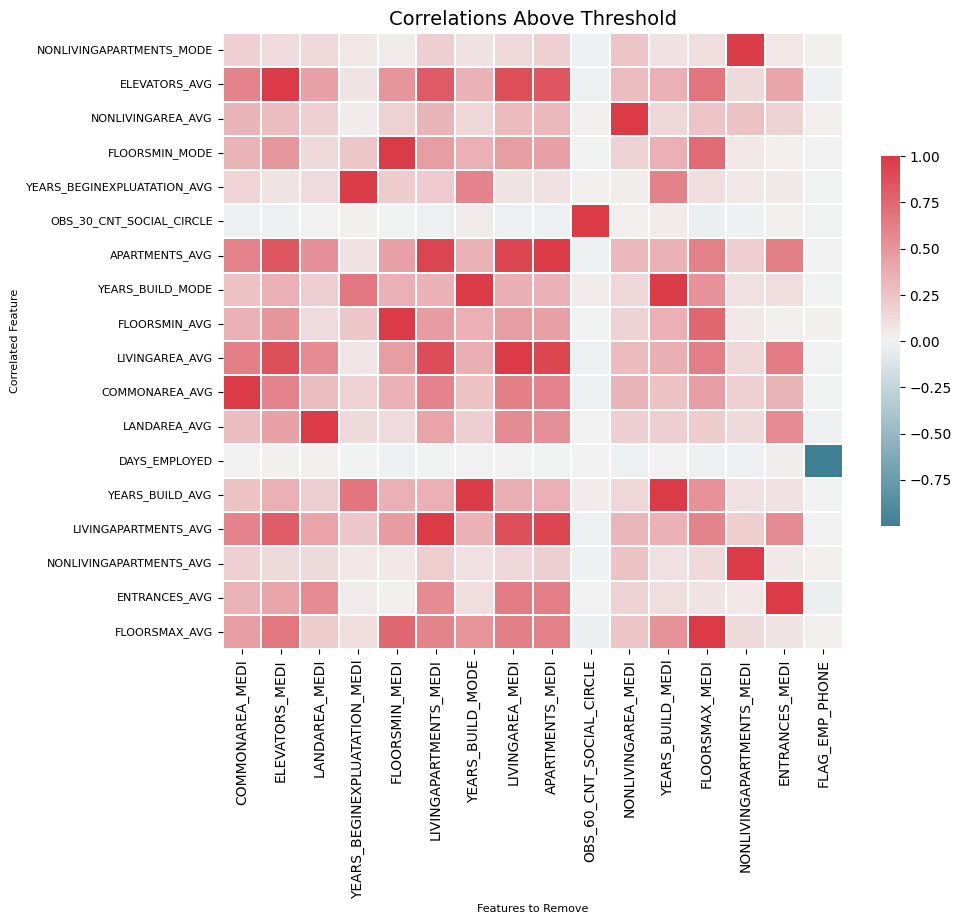

In [77]:
fs.identify_collinear(train, 0.99)
fs.plot_collinear()

35 features with a correlation greater than 0.90.



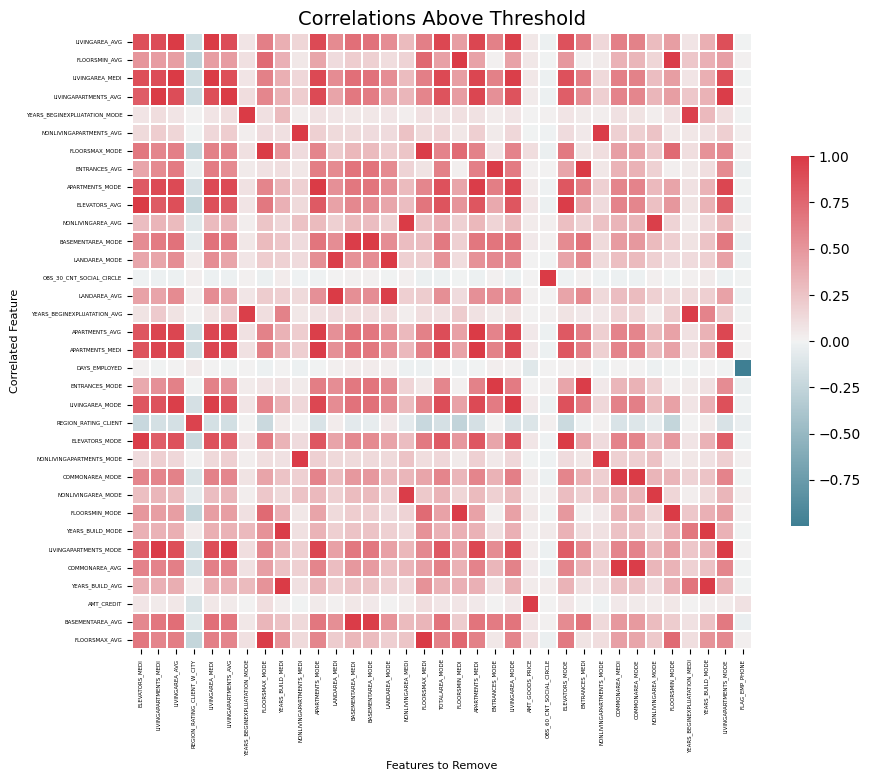

In [76]:
fs.identify_collinear(train, 0.90)
fs.plot_collinear()

**Collinearity** is a statistical term that refers to the correlation between predictor variables (or independent variables) in a regression model. When predictor variables in the same regression model are correlated, they cannot independently predict the value of the dependent variable.For example, if we are trying to predict housing prices using variables such as square footage and number of bedrooms, collinearity may occur if these two variables are highly correlated with each other. This means that it would be difficult to determine which variable is more important in predicting housing prices.Collinearity can cause problems in statistical analysis because it can lead to biased estimates and incorrect conclusions about relationships between variables. Therefore, it is important to detect and correct for collinearity when analyzing data.Overall, collinearity is an important concept in statistics that refers to the correlation between predictor variables in a regression model. Understanding this concept can help researchers make more accurate conclusions about relationships between variables and improve their statistical analyses.

In [80]:
fs.identify_zero_importance(train, train_labels, eval_metric='auc')

Training Gradient Boosting Model


89 features with zero importance.



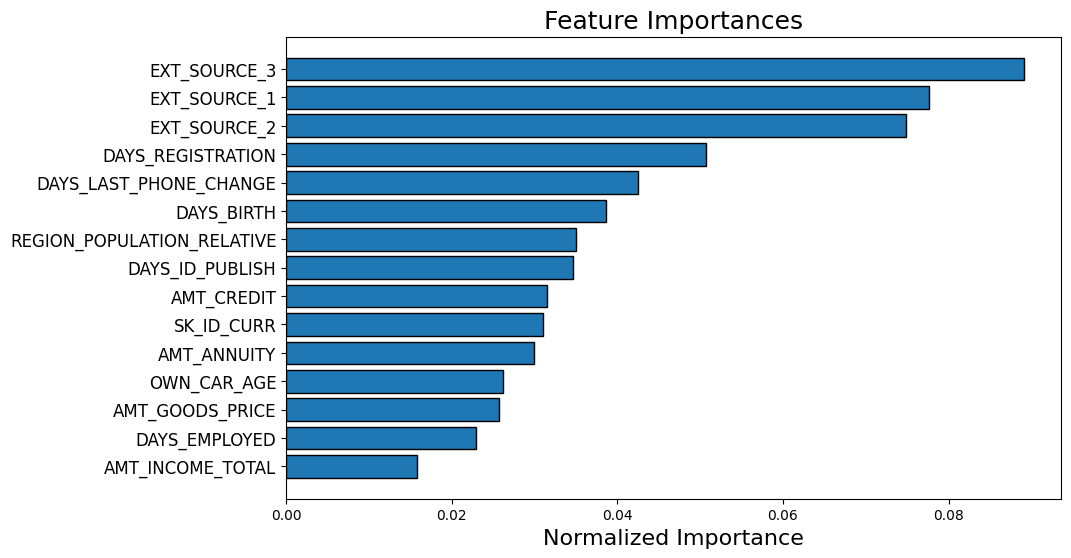

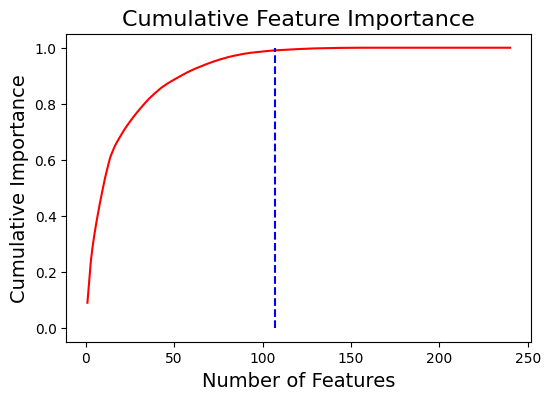

107 features required for 0.99 of cumulative importance


In [81]:
fs.plot_feature_importances(threshold = 0.99)

In [100]:
fs.identify_all(train, train_labels, {'missing_threshold': 0.8, 'correlation_threshold': 0.95, 'eval_metric': 'auc','task': 'classification', 'cumulative_importance': 0.95})

0 features with greater than 0.80 missing values.

3 features with a single unique value.

32 features with a correlation greater than 0.95.

Training Gradient Boosting Model


83 features with zero importance.

167 features that do not contribute to cumulative importance of 0.95.

186 total features out of 240 identified for removal.



In [101]:
features_identified = fs.check_identified()

186 features identified for removal


In [102]:
list(features_identified)[:10]

['ORGANIZATION_TYPE_Cleaning',
 'NAME_INCOME_TYPE_Unemployed',
 'ORGANIZATION_TYPE_Industry: type 8',
 'ORGANIZATION_TYPE_Insurance',
 'ORGANIZATION_TYPE_University',
 'WEEKDAY_APPR_PROCESS_START_SATURDAY',
 'ORGANIZATION_TYPE_Trade: type 4',
 'NAME_HOUSING_TYPE_House / apartment',
 'ORGANIZATION_TYPE_Trade: type 1',
 'YEARS_BUILD_MEDI']

In [103]:
train_removed = fs.remove(train, methods = 'all')

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run
Removed 186 features


In [105]:
train_removed.to_csv('applicationData_after_FS.csv')

In [ ]:
# https://brendanhasz.github.io/2018/11/11/featuretools.html

Another way to deal with outlier is to slice the rich people and make a dedicated model for rick people

# Gradient Descent a.k.a Fitting in scikit learn

We start with guesstimate of regression equation coefficients and measure error
and by doing loss function reduction to get a better parameter value

ML is not to get perfect prediction but to reduce the errors i.e. make the error a bit smaller itertavely

gives the direction of movement


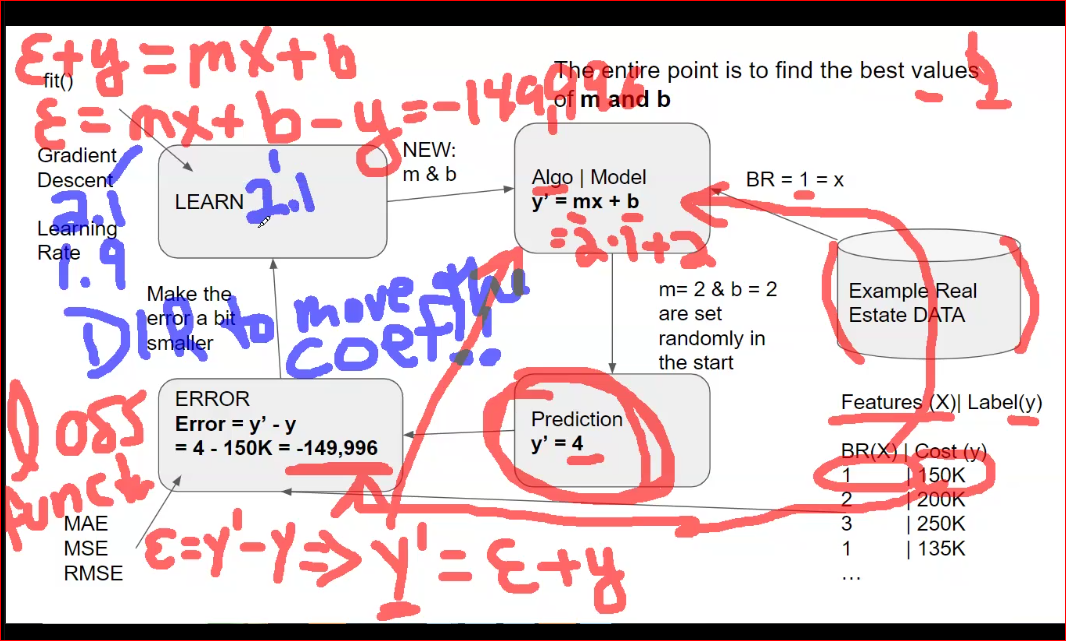

Gradient descent is an optimization algorithm used in machine learning to find the values of parameters (coefficients) of a function that minimize a cost function. The goal of gradient descent is to iteratively adjust the parameters of a model in order to minimize the difference between predicted and actual values.The basic idea behind gradient descent is to calculate the gradient (slope) of the cost function with respect to each parameter, and then update each parameter in the direction that reduces the cost function. This process is repeated until convergence, which occurs when further updates no longer significantly reduce the cost function.Gradient descent can be used with different types of models, including linear regression, logistic regression, and neural networks. It is a powerful optimization algorithm that can help improve model performance by minimizing errors between predicted and actual values.Overall, gradient descent is an important concept in machine learning that plays a key role in optimizing models for better performance. Understanding how gradient descent works can help researchers choose appropriate optimization algorithms for their specific research question and dataset.

Gradient descent is like a game. You start at the top of a mountain and your goal is to get to the bottom. You can't see the bottom, but you can take steps in different directions to get there. Each step you take is based on the slope of the mountain, which tells you which way is downhill. You keep taking steps downhill until you get to the bottom of the mountain.

Gradient descent is an optimization technique used to find the values of parameters (such as weights and biases) that minimize a cost function. It works by starting with an initial set of parameter values, calculating the cost function for those values, and then adjusting the parameters in the direction that reduces the cost. This process is repeated until the cost is minimized or a predefined threshold is reached. In other words, gradient descent is a way of finding the best set of parameters for a given problem by gradually shifting the parameters in the direction that reduces the cost.

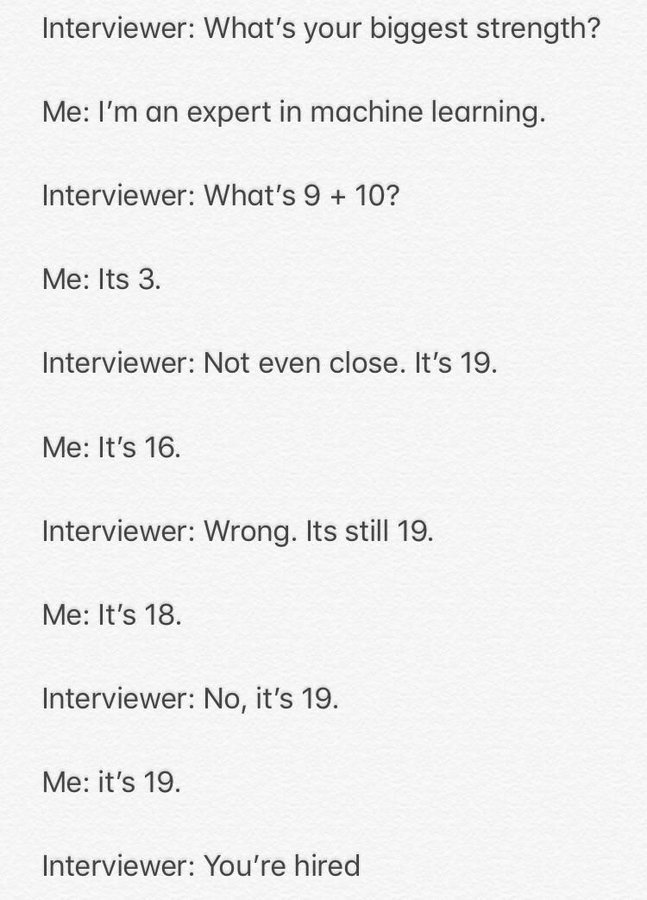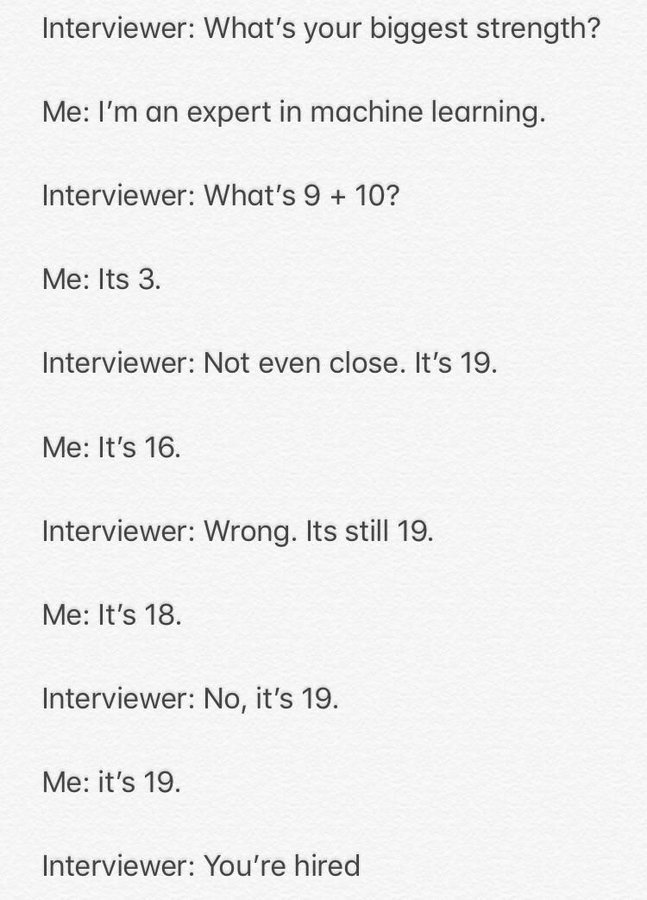

# ML OPS

every week deploy a new model

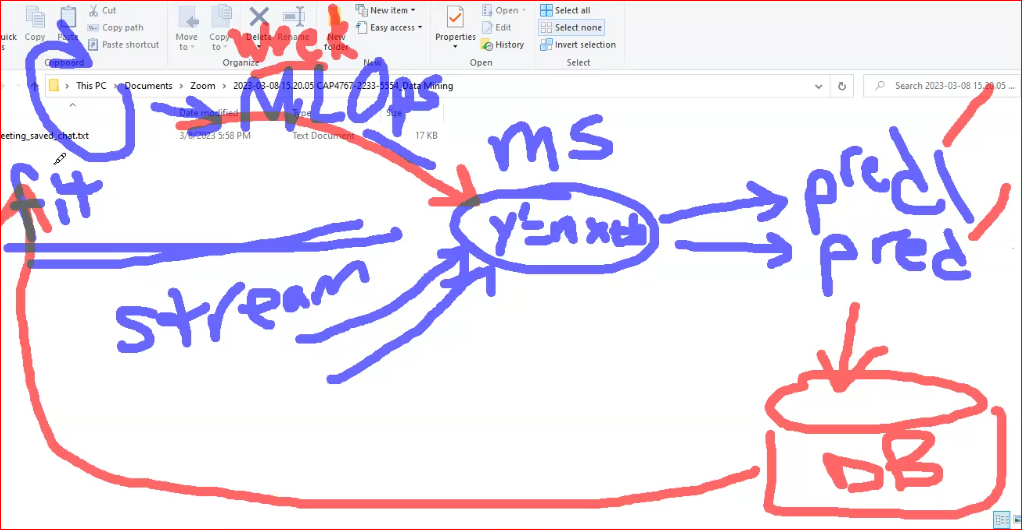

Human in the loop programming : automated credit decision prediction also corss checked with the underwriter to see if the model is predicting correctly

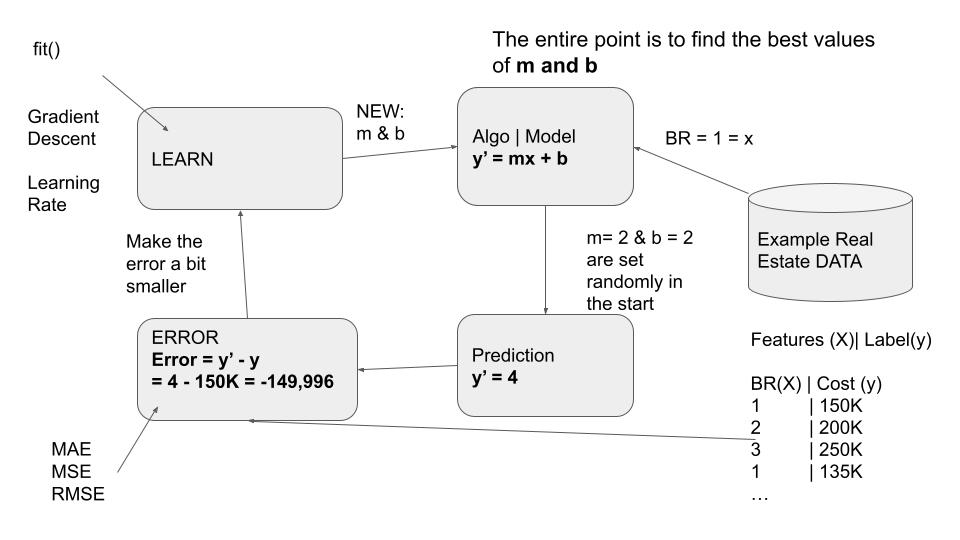

In [107]:
# BONUS --- collect stock data

In [108]:
import yfinance as yf
import plotly.graph_objs as go

In [109]:
jpmc_data = yf.download(tickers='JPM',period='1d',interval='1m')
jpmc_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-03-09 09:30:00-05:00,136.8,137.3,136.6,137.2,137.2,281441
2023-03-09 09:31:00-05:00,137.1,137.2,136.8,137.1,137.1,33117
2023-03-09 09:32:00-05:00,137.1,137.1,136.9,136.9,136.9,23350
2023-03-09 09:33:00-05:00,136.9,137.1,136.9,137.0,137.0,44605
2023-03-09 09:34:00-05:00,137.0,137.1,136.9,137.1,137.1,38175
...,...,...,...,...,...,...
2023-03-09 10:50:00-05:00,135.1,135.2,135.1,135.1,135.1,26129
2023-03-09 10:51:00-05:00,135.1,135.1,135.1,135.1,135.1,46033
2023-03-09 10:52:00-05:00,135.2,135.2,135.1,135.1,135.1,19338


In [110]:
# Define my figure
fig = go.Figure()

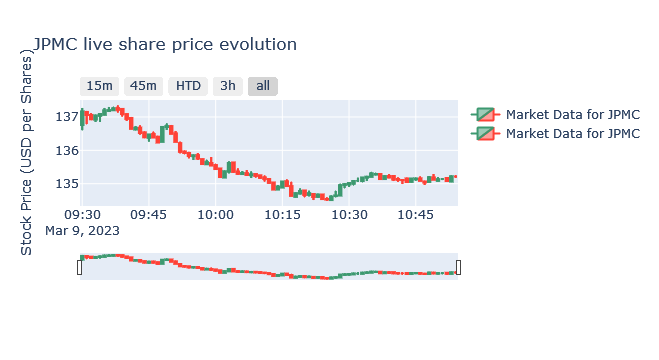

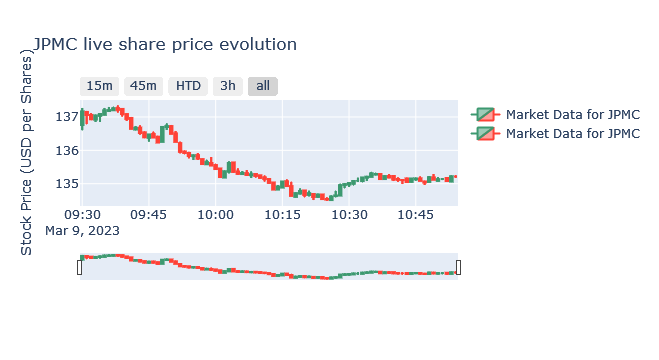

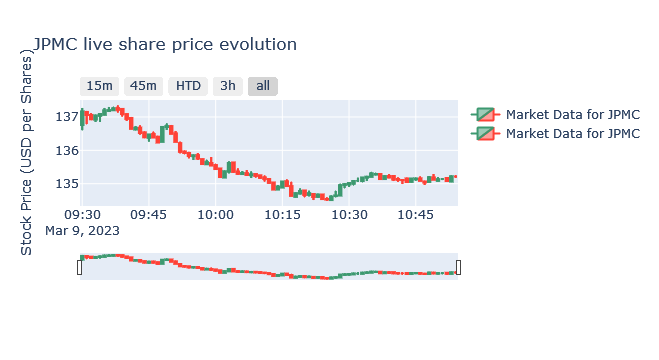

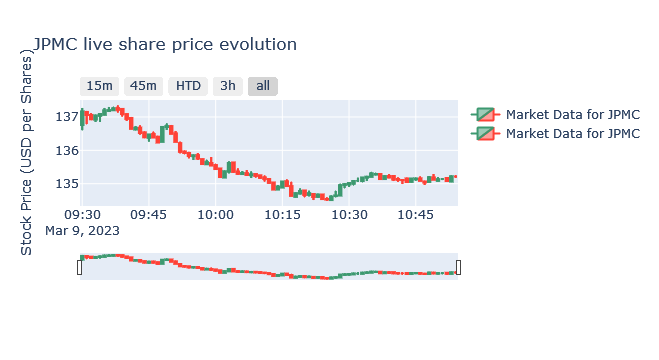

In [112]:
fig.add_trace(go.Candlestick(x=jpmc_data.index,
                             open=jpmc_data['Open'],
                             high=jpmc_data['High'],
                             low=jpmc_data['Low'],
                             close=jpmc_data['Close'], name='Market Data for JPMC'))
# Add titles
fig.update_layout(
    title='JPMC live share price evolution',
    yaxis_title='Stock Price (USD per Shares)')

# X-Axes
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=15, label="15m", step="minute", stepmode="backward"),
            dict(count=45, label="45m", step="minute", stepmode="backward"),
            dict(count=1, label="HTD", step="hour", stepmode="todate"),
            dict(count=3, label="3h", step="hour", stepmode="backward"),
            dict(step="all")
        ])
    )
)
# Show
fig.show()

In [ ]:
# https://github.com/fenago/financial-analytics